<IPython.core.display.Javascript object>


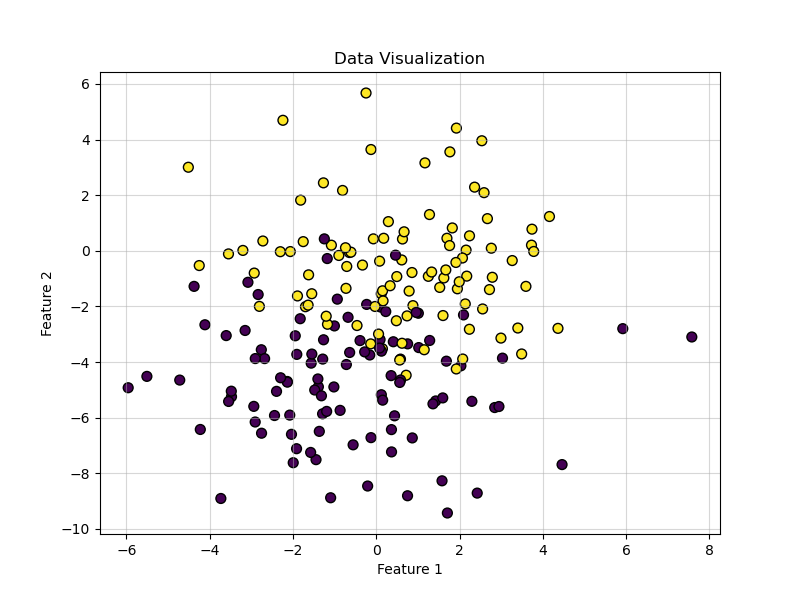

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# 1. Generate a more distinct dataset
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2, random_state=2, center_box=(-5, 5)) # Wider spread, different random state

# 2. Data Visualization (Scatter Plot) - Good practice to visualize the data first
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization')
plt.grid(alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


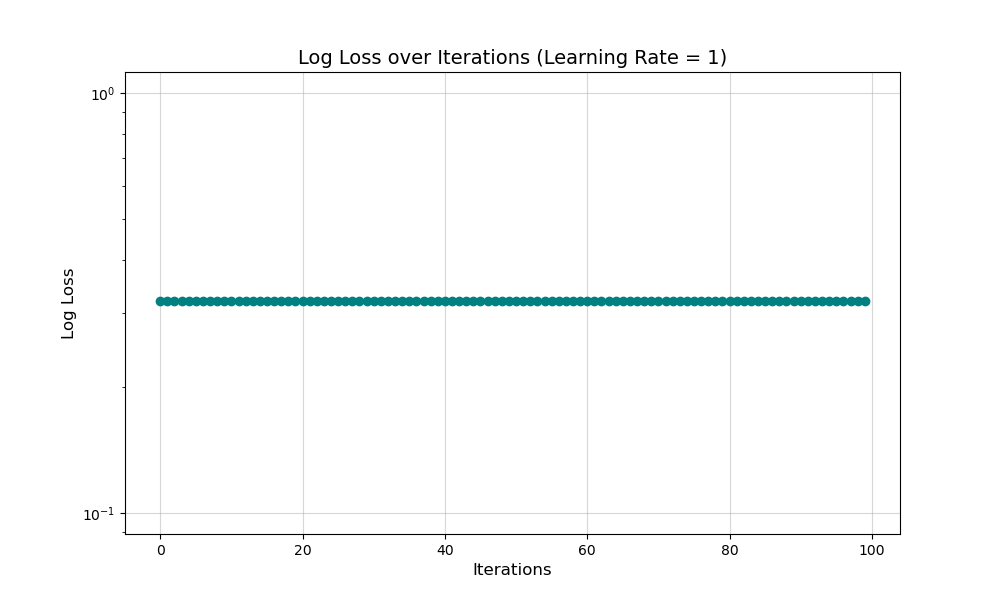

In [25]:
# Focus on a single learning rate (e.g., lr = 0.1)
selected_lr = 1
selected_loss_history = log_losses[selected_lr]

# 1. Log Loss vs. Iterations (with adjusted scale)
plt.figure(figsize=(10, 6))
plt.plot(selected_loss_history, marker='o', linestyle='-', color='teal', linewidth=2) # Emphasize the curve
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.title(f"Log Loss over Iterations (Learning Rate = {selected_lr})", fontsize=14)
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.grid(alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


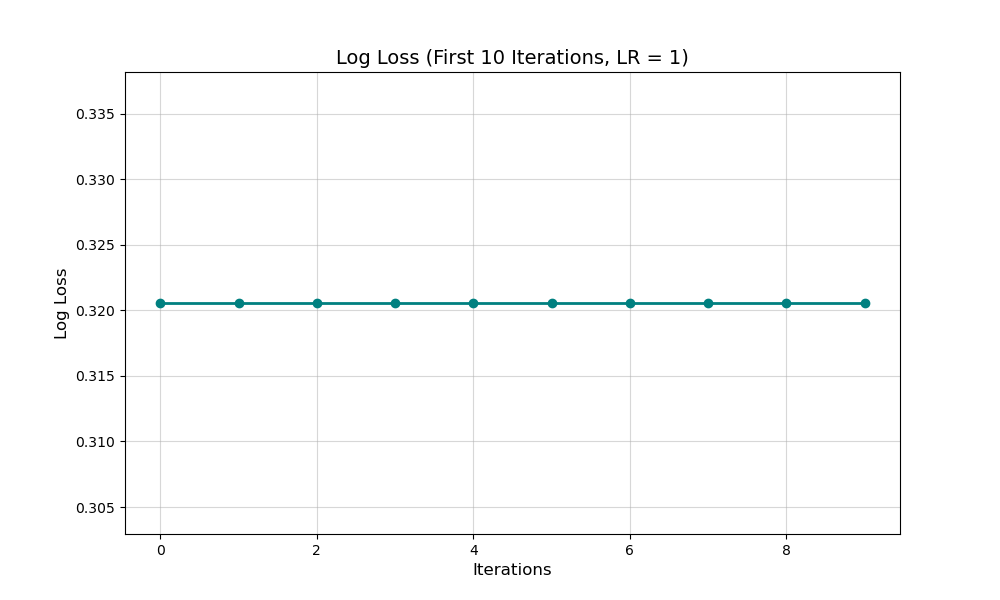

In [26]:
# 2.  Highlight Initial Iterations (Zoomed-in View) - OPTIONAL
plt.figure(figsize=(10,6))
plt.plot(selected_loss_history[:10], marker = "o", linestyle="-", color="teal", linewidth=2) # first 10 iterations
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Log Loss", fontsize=12)
plt.title(f"Log Loss (First 10 Iterations, LR = {selected_lr})", fontsize = 14)
#plt.yscale("log") # Optional for zoomed view
plt.grid(alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


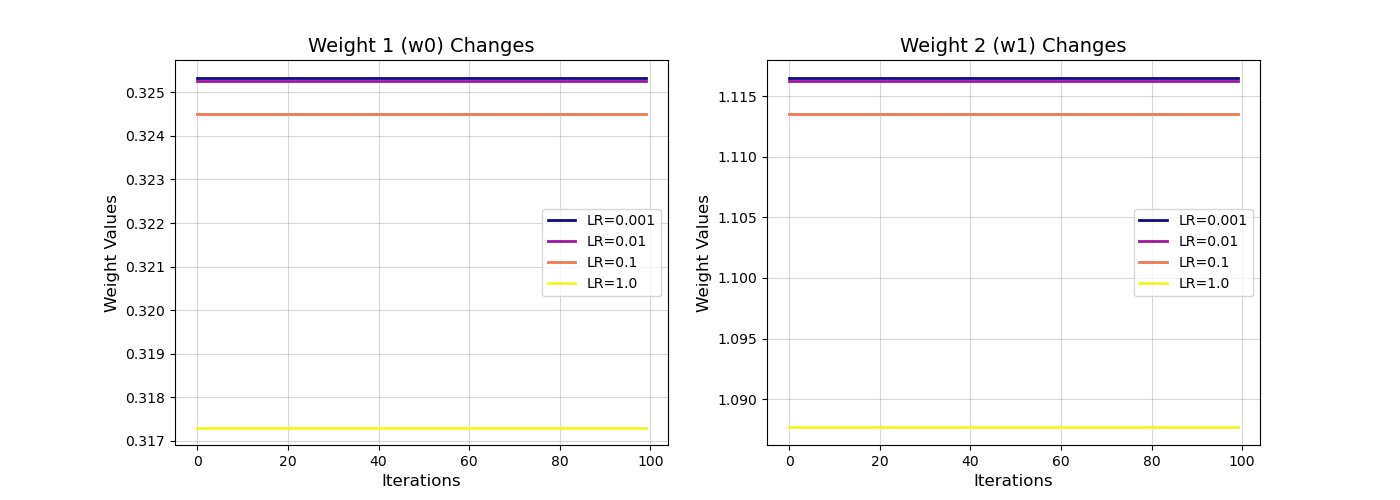

In [27]:
# 5. Weight Changes over Iterations (Separate Plots)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for lr, color in zip(learning_rates, colors):
  weight_history = weights_over_time[lr]
  axes[0].plot(weight_history[:, 0], label=f"LR={lr}", color=color, linewidth=2) # use same colors
  axes[1].plot(weight_history[:, 1], label=f"LR={lr}", color=color, linewidth=2)



# Add titles, labels, etc
for ax in axes: # Apply settings to both subplots
  ax.set_xlabel("Iterations",fontsize=12)
  ax.set_ylabel("Weight Values", fontsize=12)
  ax.legend()
  ax.grid(alpha=0.5)

axes[0].set_title("Weight 1 (w0) Changes", fontsize=14) # Correct and specific title for w0
axes[1].set_title("Weight 2 (w1) Changes", fontsize=14) # Correct and specific title for w1




plt.show()

<IPython.core.display.Javascript object>


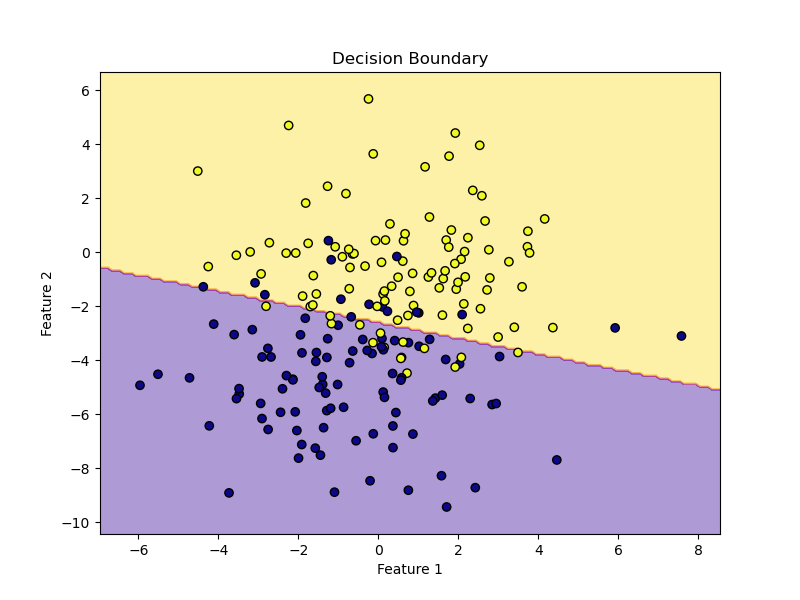

In [28]:
# 6. Decision Boundary Visualization (for highest learning rate as an example)
def plot_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='plasma')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', edgecolors='k')  # Consistent colormap
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision Boundary")
    plt.show()


model = LogisticRegression(solver='lbfgs', C=1/1.0, max_iter=1000, random_state=42).fit(X, y) # Fit the model and show decision boundary
plot_decision_regions(X, y, model)